# 1 はじめに

In [2]:
# ライブラリインストール
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import mglearn
from IPython.display import display
import joblib
import warnings
warnings.simplefilter('ignore')

#　matplotlibでグラフ表示のマジックコマンド
%matplotlib inline

c:\users\nagar\.virtualenvs\introduction_to_ml_with_python-6nqet9co\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "
c:\users\nagar\.virtualenvs\introduction_to_ml_with_python-6nqet9co\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## Versions

In [3]:
import sys
print(f'Python version: {sys.version}')

print(f'Pandas version: {pd.__version__}')

import matplotlib
print(f'matplotlib version: {matplotlib.__version__}')

print(f'Numpy version: {np.__version__}')

import scipy
print(f'SciPy version: {scipy.__version__}')

Python version: 3.8.1 (tags/v3.8.1:1b293b6, Dec 18 2019, 23:11:46) [MSC v.1916 64 bit (AMD64)]
Pandas version: 0.25.3
matplotlib version: 3.1.2
Numpy version: 1.18.0
SciPy version: 1.4.1


## 1.4.2 Numpy

In [4]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
print('x:\n{}'.format(x))

x:
[[1 2 3]
 [4 5 6]]


## 1.4.3 SciPy

In [5]:
from scipy import sparse

# 対角成分が1でそれ以外が0の、2次元Numpy配列を作る
eye = np.eye(4)
print('Numpy array:\n{}'.format(eye))

Numpy array:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [6]:
# Numpy配列をScipyのCSR形式の疎行列に変換する
# 非ゼロ要素だけが格納される

sparse_matrix = sparse.csr_matrix(eye)
print('\nScipy sparse CSR matrix(ScipyのCSR形式の疎行列):\n{}'.format(sparse_matrix))


Scipy sparse CSR matrix(ScipyのCSR形式の疎行列):
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


疎行列とは

[疎行列（そぎょうれつ、英: sparse matrix）とは、成分のほとんどが零である行列のことをいう。スパース行列とも言う。](https://ja.wikipedia.org/wiki/%E7%96%8E%E8%A1%8C%E5%88%97)

In [7]:
# sparse matrixと同じものをCOO形式で作る
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print('COO representation:\n{}'.format(eye_coo))

COO representation:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


## 1.4.4 Matplotlib

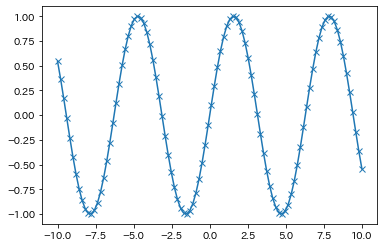

In [8]:
import matplotlib.pyplot as plt
import japanize_matplotlib

# -10から10までを100ステップに区切った列を配列として生成
x = np.linspace(-10, 10, 100)
# サイン関数を用いて2つ目の配列を生成
y = np.sin(x)
# plot関数は一方の配列に対して他方の配列をプロットする
plt.plot(x, y, marker='x')
plt.show()

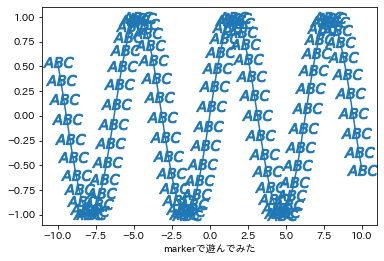

In [9]:
# markerで遊んでみた
plt.plot(x, y, marker='$ABC$', markersize=30)
plt.xlabel('markerで遊んでみた')
plt.show()

### [matplotlib.markers](https://matplotlib.org/api/markers_api.html)

## 1.4.5 Pandas

In [10]:
import pandas as pd
# IPython.display.display関数を呼ぶ
from IPython.display import display

In [11]:
# 人を表す簡単なデータセットを作る
data = {
        'Name': ['John', 'Anna', 'Peter', 'Linda'],
        'Location': ['New York', 'paris', 'Berlin', 'London'],
        'Age': [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
# IPython.displayを用いるとDataFrameを
# Jupyter lab 上できれいに表示することができる。
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [12]:
# ageカラムが30を超えるすべての行を取り出す（SQL likeに操作できるの良い！）
display(data_pandas[data_pandas.Age > 30])

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


## 1.4.6 mglearn

### [Helper functions for the book "Introduction to Machine Learning with Python"](https://github.com/amueller/mglearn)

### [Introduction to Machine Learning with Python](https://github.com/amueller/introduction_to_ml_with_python)

## Classification Iris

In [13]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [14]:
print('Keys of iris_dataset:\n{}'.format(iris_dataset.keys()))

Keys of iris_dataset:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [15]:
print(iris_dataset['DESCR'][:193] + '\n...')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [16]:
print('Target names: {}'.format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [17]:
print('Feature names: \n{}'.format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [18]:
print('Type of data: {}'.format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [19]:
print('Shape of data: {}'.format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [20]:
print('First five columns of data:\n{}'.format(iris_dataset['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [21]:
print('Type of target: {}\n'.format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>



In [22]:
print('Shape of target: {}'.format(iris_dataset['target'].shape))

Shape of target: (150,)


In [23]:
print('Target:\n{}'.format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [24]:
print('Type of target_name: {}'.format(iris_dataset['target_names']))

Type of target_name: ['setosa' 'versicolor' 'virginica']


In [25]:
print(f'iris_dataset["data"] as X_train: \n{iris_dataset["data"][:5]}')
print(f'iris_dataset["target"] as y_train: \n{iris_dataset["target"][:]}')

iris_dataset["data"] as X_train: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
iris_dataset["target"] as y_train: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0
)

In [27]:
print(f'X_train: \n{X_train[:5]}')
print(f'X_test: \n{X_test[:5]}')
print(f'y_train: \n{y_train[:5]}')
print(f'y_test: \n{y_test[:5]}')

X_train: 
[[5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]]
X_test: 
[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]]
y_train: 
[1 1 2 0 2]
y_test: 
[2 1 0 2 0]


In [28]:
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [29]:
print('X_test shape: {}'.format(X_test.shape))
print('y_teat shape: {}'.format(y_test.shape))

X_test shape: (38, 4)
y_teat shape: (38,)


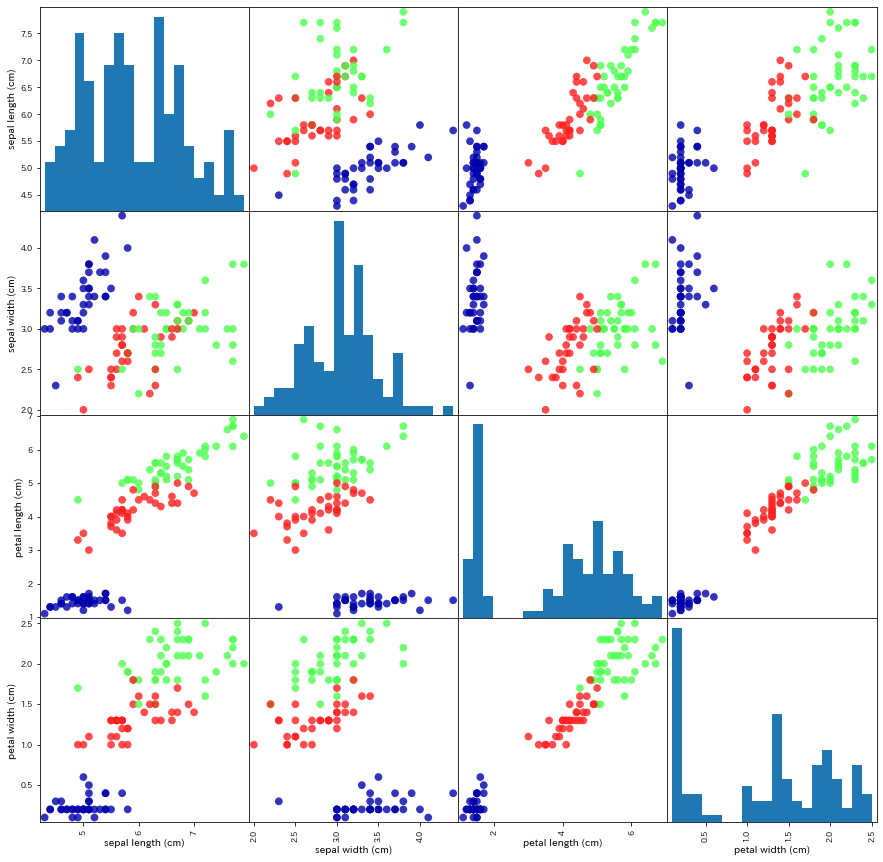

In [30]:
# X_trainのデータからDataFrameを作る。
# iris_dataset.feature_namesの文字列を使ってColumnに名前を付ける。
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# データフレームからscatter matrixを作成し、y_trainに従って色を付ける。
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o', 
                       hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

## 1.7.4 k-Nearest Neighbors(k-最近傍法)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [32]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [33]:
# 新しいアイリスのデータ（ガクの長さ: 5cm, ガクの幅: 2.9cm, 花弁の長さ: 1cm, 花弁の幅: 0.2cm）
X_new = np.array([[5, 2.9, 1, 0.2]])
print('サンプル数: 1, 特徴量: 4 \nX_new.shape: {}'.format(X_new.shape))

サンプル数: 1, 特徴量: 4 
X_new.shape: (1, 4)


In [34]:
# 予測を行う
prediction = knn.predict(X_new)
print('Prediction: {}'.format(prediction))
print('Predicted target name: {}'.format(
        iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


In [35]:
# モデルの評価
y_pred = knn.predict(X_test)
print('Test set predictions:\n {}'.format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [36]:
print('Test set score: {:.2f}'.format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [37]:
# knnオブジェクトのscoreメソッドの場合
print('Test set score: {:.2f}'.format(knn.score(X_test, y_test)))

Test set score: 0.97


In [38]:
# 訓練と評価を行うための最小手順
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print('Test set score: {:.2f}'.format(knn.score(X_test, y_test)))

Test set score: 0.97
